0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
0.7623381818181818


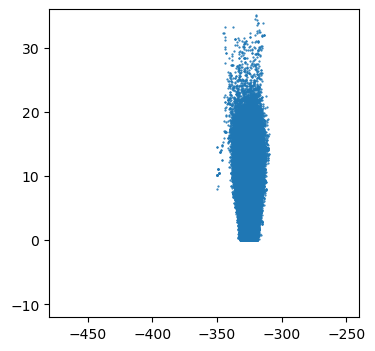

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


def metropolis(func, steps, init_para, exp_func, burn_in=None) :
    if burn_in is None :
        burn_in = int(0.1*steps)
    steps += burn_in
    hist = []
    dump = []
    pos = np.array(init_para)
    for step in range(steps) :
        if step%10000==0 :
            print(step)
        hist += [pos]
        new_pos = pos + exp_func()
        if new_pos[1]>0 and random.random()<min(1, func(new_pos,pos)) :
            pos = new_pos
        else :
            dump += [new_pos]
            
    df = pd.DataFrame(np.array(hist), columns=["vr", "sigma"])
    df.to_csv("output.csv", index=False)
    return np.array(hist), np.array(dump)


def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Per1.csv')

vr = np.array(data['vr'])
e_vr = np.array(data['e_vr'])
n = len(vr)
init_para = [-350,8]
#func = lambda para1,para2: np.exp(np.sum(lnG(vr,*para1))-np.sum(lnG(vr,*para2)))
def func(para1, para2) :
    S1 = para1[1]**2+e_vr**2
    S2 = para2[1]**2+e_vr**2
    return np.exp(np.sum((vr-para2[0])**2/(2*S2)+np.log(S2)/2)-np.sum((vr-para1[0])**2/(2*S1)+np.log(S1)/2))
def exp_func(sx,sy) :
    def f() :
        return np.array([random.gauss(0, sx), random.gauss(0, sy)])
    return f
def analyse() :
    hist, dump = metropolis(func=func, steps=1000000, init_para=init_para, exp_func=exp_func(1.3,1.3))
    print(1-len(dump)/(len(hist)))
    if False :
        return
    plt.figure(figsize=(4,4))
    plt.xlim(-480,-240)
    plt.ylim(-12,36)
    plt.scatter(*hist.T,alpha=1,s=0.3)
    plt.show()
analyse()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
data_path = '../Materials/data/'

r = pd.read_csv(data_path+"rh_chains/r_Per.csv")
r = np.array(r['col6'])
#dist = np.random.normal(loc=24.45, scale=0.14, size=len(r)) #Cas
dist = np.random.normal(loc=24.49, scale=0.18, size=len(r)) #Per
dist = 10**(dist/5+1)
r_h = dist*(r/60/180*np.pi)
print(r_h)

[324.29053002 371.53354893 409.78827947 ... 453.64113622 478.58076707
 434.66127869]


6.548196185883589 0.8721493565461815


Text(0.5, 1.0, 'Total mass of per Ⅰ')

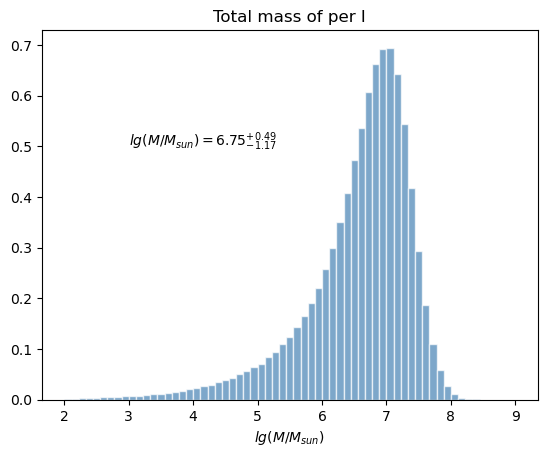

In [17]:
sig = np.array(pd.read_csv('MCMC Per1.csv')['sigma'])
M = np.log10(580*(r_h*sig[-len(r_h):]**2))
print(np.mean(M),np.std(M))
med = np.median(M)
L = np.sqrt(np.mean((M[M<=med]-med)**2))
R = np.sqrt(np.mean((M[M>med]-med)**2))
plt.hist(M, bins=np.linspace(2,9,64), density=True, alpha=0.7, color='steelblue', edgecolor='white')
plt.text(3,0.5,f"$lg(M/M_{{sun}})={med:.2f}^{{+{R:.2f}}}_{{-{L:.2f}}}$")
plt.xlabel("$lg(M/M_{sun})$")
plt.title("Total mass of per Ⅰ")